In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

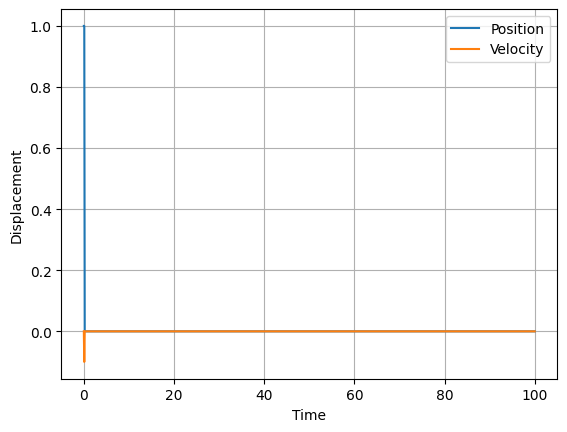

In [7]:
#Timestep
N = 1000 
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

#Paramters
k = 1
m = 1
x0 = 1
v0 = 0
w = 1 #w = sqrt.(k/m) = 1

#Potential Well Boundaries
x_min = -2
x_max = 2

#Leapfrog Integrator
def integrator(x0, v0, w, N): 
     x = np.zeros(N)
     v = np.zeros(N)

     #initial positions
     x[0] = x0 
     v[0] = v0
     
     
     for i in range(N-1):
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i] + x[i] * (-w**2) * dt
        if x_min <= x[i+1] <= x_max:
             x[i] = x[i+1]
        else:
             x[i] = np.clip(x[i+1], x_min, x_max)
             v[i+1] *= -1

        return x,v
     
x,v = integrator(x0, v0, w, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()
